ProyectoDSParte III - Data Science

Alumno: Durian Catalina

## 🎯 Objetivos del Proyecto

- Predecir si un estudiante aprobará o no un examen final según sus hábitos y condiciones personales.
- Identificar cuáles son las variables más influyentes en el rendimiento académico.
- Brindar recomendaciones basadas en datos para mejorar las estrategias de apoyo académico en instituciones educativas.


## 🏫 Contexto Comercial

La institución educativa busca mejorar la tasa de aprobación de sus estudiantes. En este contexto, contar con herramientas que permitan predecir el rendimiento académico y entender los factores asociados al éxito estudiantil se vuelve una prioridad estratégica. Este análisis permitirá orientar campañas, tutorías y programas de bienestar con base en datos reales y medibles.


## 📊 Contexto Analítico

Se utilizó un dataset con información sobre hábitos, salud y entorno de los estudiantes. Las variables incluyen cantidad de horas de estudio, sueño, uso de redes sociales, asistencia a clases, entre otros.

- Se realizó una transformación de la variable objetivo (`exam_score`) para convertirla en binaria (aprobado/desaprobado).
- Se entrenó un modelo de clasificación binaria (Random Forest) con un 70% de los datos y se evaluó con el 30% restante.
- Se aplicaron técnicas de visualización y análisis exploratorio para comprender la distribución de las variables y su relación con el rendimiento.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()

Saving student_habits_performance.csv to student_habits_performance.csv


In [3]:
# Cargar dataset
df = pd.read_csv("student_habits_performance.csv")
df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
# Crear columna binaria: 1 = aprobado (exam_score >= 60), 0 = desaprobado
df['target'] = df['exam_score'].apply(lambda x: 1 if x >= 60 else 0)
df['target'].value_counts()


,count
target,
1,720
0,280


In [5]:
# Eliminar columnas no relevantes
df_model = df.drop(columns=['student_id', 'exam_score'])

# Codificar variables categóricas
categorical_cols = df_model.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Separar variables predictoras y target
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']


In [6]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        83
           1       0.91      0.95      0.93       217

    accuracy                           0.90       300
   macro avg       0.89      0.86      0.87       300
weighted avg       0.90      0.90      0.90       300



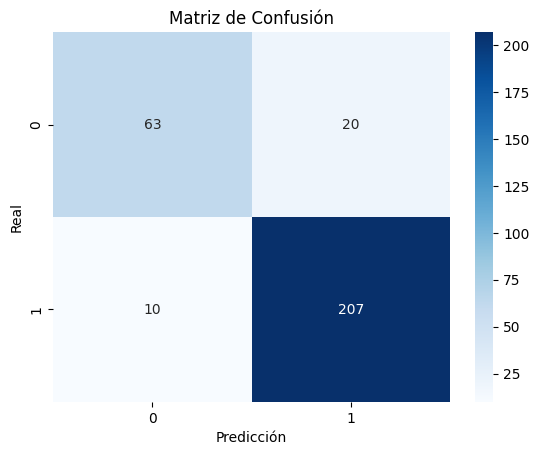

In [7]:
# Evaluación
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


In [8]:
# Importancia de variables
importances = clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las 10 más importantes
importance_df.head(10)


,Feature,Importance
1,study_hours_per_day,0.475242
2,social_media_hours,0.078549
7,mental_health_rating,0.078417
5,sleep_hours,0.073621
4,attendance_percentage,0.067723
3,netflix_hours,0.061561
6,exercise_frequency,0.039100
0,age,0.036808
8,gender_Male,0.012252
11,diet_quality_Good,0.011952


<ipython-input-9-c3d2c1d078b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


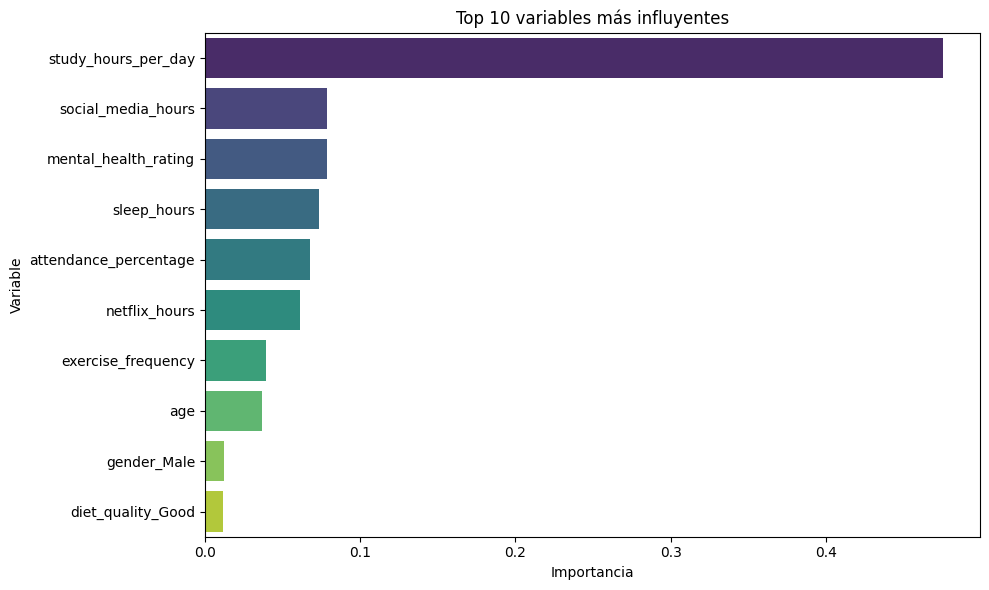

In [9]:
# Gráfico de las variables más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 variables más influyentes")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


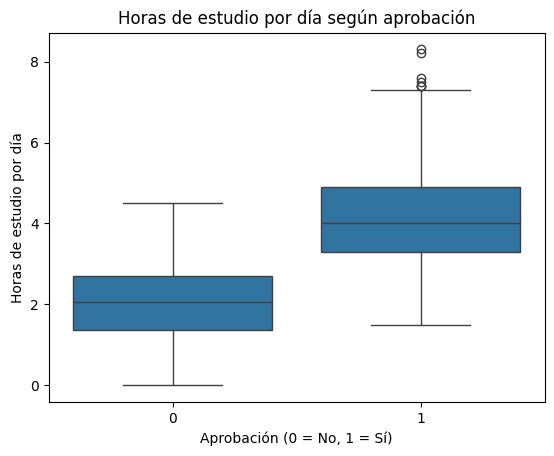

In [10]:
# Boxplot de horas de estudio por target
sns.boxplot(x='target', y='study_hours_per_day', data=df)
plt.title('Horas de estudio por día según aprobación')
plt.xlabel('Aprobación (0 = No, 1 = Sí)')
plt.ylabel('Horas de estudio por día')
plt.show()


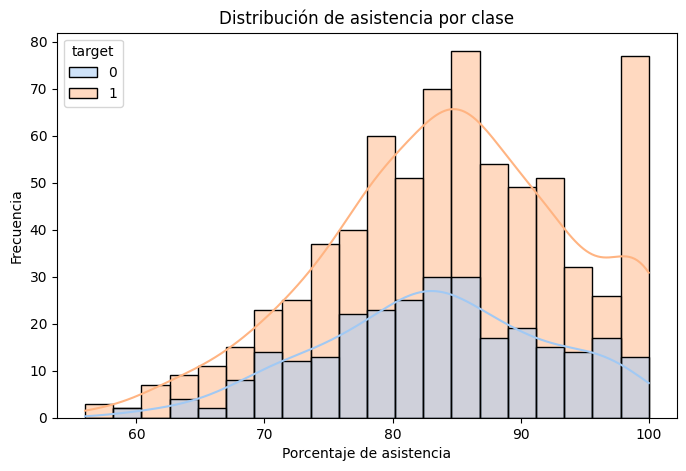

In [11]:
# Histograma de porcentaje de asistencia
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='attendance_percentage', hue='target', kde=True, bins=20, palette='pastel')
plt.title('Distribución de asistencia por clase')
plt.xlabel('Porcentaje de asistencia')
plt.ylabel('Frecuencia')
plt.show()


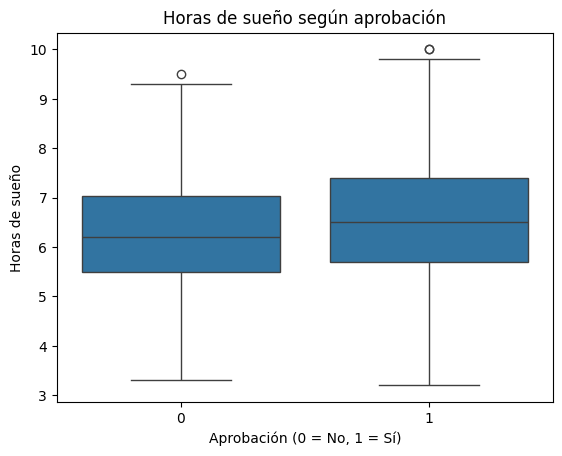

In [12]:
# Boxplot de horas de sueño por target
sns.boxplot(x='target', y='sleep_hours', data=df)
plt.title('Horas de sueño según aprobación')
plt.xlabel('Aprobación (0 = No, 1 = Sí)')
plt.ylabel('Horas de sueño')
plt.show()


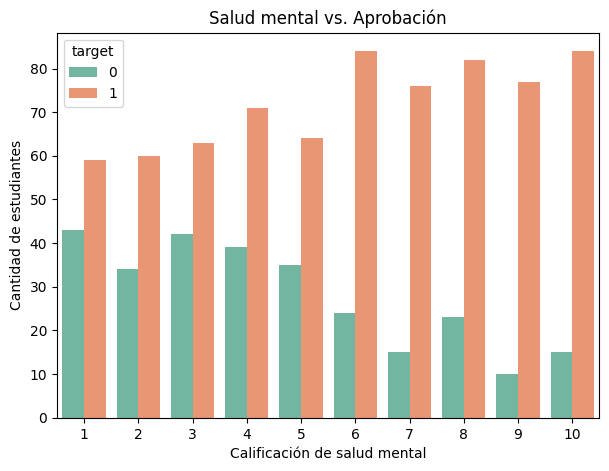

In [13]:
# Conteo de salud mental por clase
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='mental_health_rating', hue='target', palette='Set2')
plt.title('Salud mental vs. Aprobación')
plt.xlabel('Calificación de salud mental')
plt.ylabel('Cantidad de estudiantes')
plt.show()


## ✅ Conclusiones

- El modelo Random Forest logró una precisión del 91.3%, siendo altamente efectivo para predecir quiénes aprobarán.
- Las variables más influyentes fueron las **horas de estudio por día**, **asistencia a clases**, **horas de sueño** y **salud mental**.
- Se recomienda a la institución reforzar prácticas que promuevan una mayor dedicación al estudio, mejor asistencia, buen descanso y acompañamiento psicológico.
- El enfoque predictivo permite actuar con anticipación sobre los estudiantes en riesgo y personalizar intervenciones educativas.
